In [92]:
import sys
sys.path.append(os.path.abspath("/Users/karl/Documents/Git/A2C_test"))
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import math
import torch
import tool
import imp
imp.reload(tool)

<module 'tool' from '/Users/karl/Documents/Git/A2C_test/tool.py'>

In [125]:
direc = '/Users/karl/Documents/Git/A2C_test/NewResult/no_modulation/tanh_nomodulation_norm_1.1'
direc2 = '/Users/karl/Documents/Git/A2C_test/NewResult/f1_modulation/tanh_f1modulation_fixed0.1_1.0'
events = get_event_files(direc)
events2 = get_event_files(direc2)

commit
Jan11_19-50-52_jinwei-a2c-6
Jan11_19-54-22_jinwei-a2c-3
Jan11_19-53-23_jinwei-a2c-4
Jan11_19-47-37_jinwei-a2c-9
Jan11_19-55-40_jinwei-a2c-2
Jan11_19-56-27_jinwei-a2c-1
Jan11_19-48-32_jinwei-a2c-8
Jan11_19-50-03_jinwei-a2c-7
Jan11_19-51-54_jinwei-a2c-5
Jan11_19-46-44_jinwei-a2c-10
commit
Jan12_07-42-07_jinwei-a2c-8
Jan12_07-47-05_jinwei-a2c-10
Jan12_16-10-05_jinwei-a2c-3
Jan12_18-51-33_jinwei-a2c-4
Jan12_07-48-09_jinwei-a2c-7
Jan12_18-37-39_jinwei-a2c-1
Jan12_16-00-05_jinwei-a2c-2
Jan12_05-47-36_jinwei-a2c-5
Jan12_07-48-41_jinwei-a2c-6
Jan12_16-00-05_jinwei-a2c-9


In [126]:
events2

['/Users/karl/Documents/Git/A2C_test/NewResult/f1_modulation/tanh_f1modulation_fixed0.1_1.0/Jan12_07-42-07_jinwei-a2c-8/events.out.tfevents.1547278927.jinwei-a2c-8',
 '/Users/karl/Documents/Git/A2C_test/NewResult/f1_modulation/tanh_f1modulation_fixed0.1_1.0/Jan12_07-47-05_jinwei-a2c-10/events.out.tfevents.1547279225.jinwei-a2c-10',
 '/Users/karl/Documents/Git/A2C_test/NewResult/f1_modulation/tanh_f1modulation_fixed0.1_1.0/Jan12_16-10-05_jinwei-a2c-3/events.out.tfevents.1547309405.jinwei-a2c-3',
 '/Users/karl/Documents/Git/A2C_test/NewResult/f1_modulation/tanh_f1modulation_fixed0.1_1.0/Jan12_18-51-33_jinwei-a2c-4/events.out.tfevents.1547319093.jinwei-a2c-4',
 '/Users/karl/Documents/Git/A2C_test/NewResult/f1_modulation/tanh_f1modulation_fixed0.1_1.0/Jan12_07-48-09_jinwei-a2c-7/events.out.tfevents.1547279289.jinwei-a2c-7',
 '/Users/karl/Documents/Git/A2C_test/NewResult/f1_modulation/tanh_f1modulation_fixed0.1_1.0/Jan12_18-37-39_jinwei-a2c-1/events.out.tfevents.1547318259.jinwei-a2c-1',
 '

In [93]:
log_dic = tool.get_log(events[0])

In [94]:
eva = log_dic[0]
pderror = log_dic[1]
entropy = log_dic[4]

In [98]:
eva_val = [i for i in eva.values()]
pderror_val = [i for i in pderror.values()]
entropy_val = [i for i in entropy.values()]

In [109]:
all_done = [i for i in log_dic[5].keys()]
done = all_done[2::3]

In [87]:
done[-1]

3124813

In [152]:
def plotfig(done, all_done, i,  eva, pderror, entropy, eva_max = None):
    assert(len(eva) == len(pderror))
    assert(len(pderror) == len(entropy))
    end = done[i+1]
    start = done[i]
    first_die = all_done[(i+1)*3] - all_done[(i+1)*3-1]
    second_die = all_done[(i+1)*3+1] - all_done[(i+1)*3] + first_die
    fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize=(15,5))
    ax1.plot(range(end-start), eva[start:end])
    ax1.plot(first_die, 0, 'ro')
    ax1.plot(second_die, 0, 'ro')
    ax2.plot(range(end-start), pderror[start:end])
    ax2.plot(first_die, 0, 'ro')
    ax2.plot(second_die, 0, 'ro')
    ax3.plot(range(end-start), entropy[start:end])
    ax3.plot(first_die, 0, 'ro')
    ax3.plot(second_die, 0, 'ro')
    plt.tight_layout()
    
def plotfig2(done, all_done, i,  eva, pderror, entropy, eva_max = None):
    assert(len(eva) == len(pderror))
    assert(len(pderror) == len(entropy))
    end = done[i+1]
    start = done[i]
    first_die = all_done[(i+1)*3] - all_done[(i+1)*3-1]
    second_die = all_done[(i+1)*3+1] - all_done[(i+1)*3] + first_die
    fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(10,5))
    ax1.plot(range(end-start), eva[start:end])
    ax1.plot(first_die, 0, 'ro')
    ax1.plot(second_die, 0, 'ro')
    ax1.set_xlabel("time steps")
    ax1.set_ylabel("prediction error")
    ax1.set_title("Prediction Error In One Episode")
    ax2.plot(range(end-start), entropy[start:end])
    ax2.plot(first_die, 0, 'ro')
    ax2.plot(second_die, 0, 'ro')
    ax2.set_title("Entropy In One Episode")
    ax2.set_xlabel("time steps")
    ax2.set_ylabel("entropy")
    ax1.annotate('agent lost life', xy=(first_die, 0), xytext=(600, 2),
            arrowprops=dict(facecolor='red', shrink=0.001),
            )
    plt.tight_layout()
    fig.savefig("/Users/karl/Desktop/result.jpg",dpi=300)

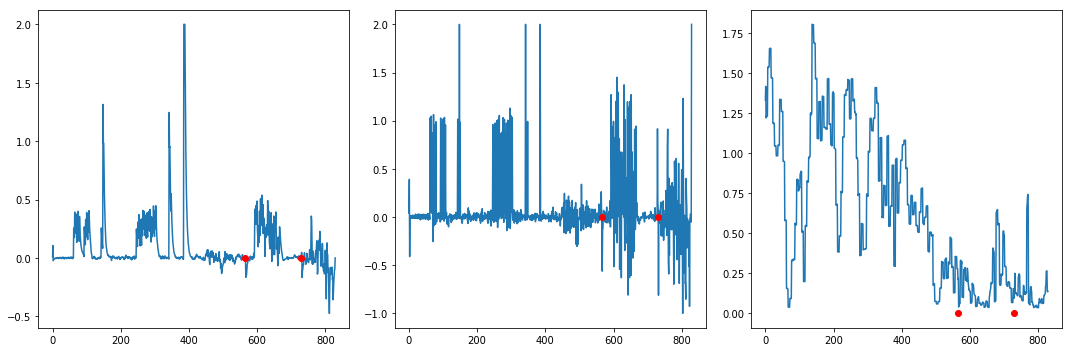

In [121]:
plotfig(done, all_done, 0, tool.limit(eva_val, 2,-1), tool.limit(pderror_val,2,-1), entropy_val)

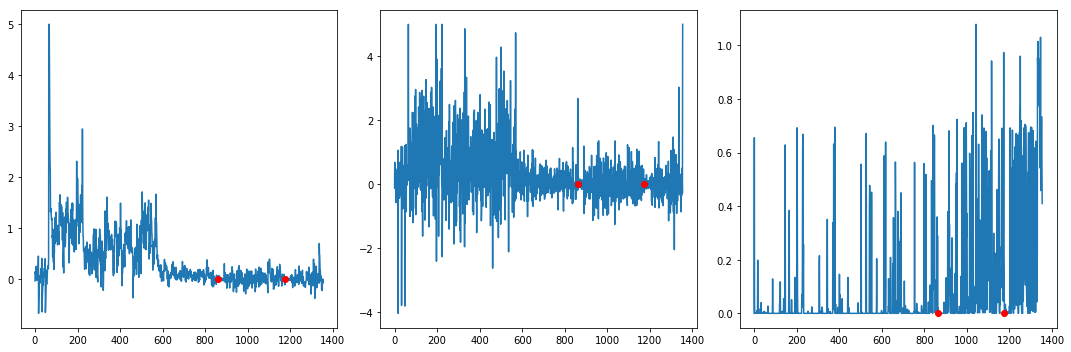

In [122]:
plotfig(done, all_done, 1000, tool.limit(eva_val, 5,-5), tool.limit(pderror_val,5,-5), entropy_val)

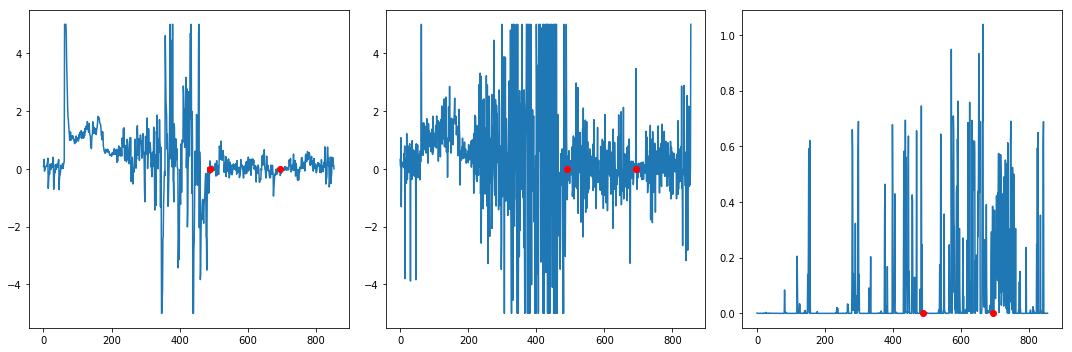

In [123]:
plotfig(done, all_done, 2000, tool.limit(eva_val, 5,-5), tool.limit(pderror_val,5,-5), entropy_val)

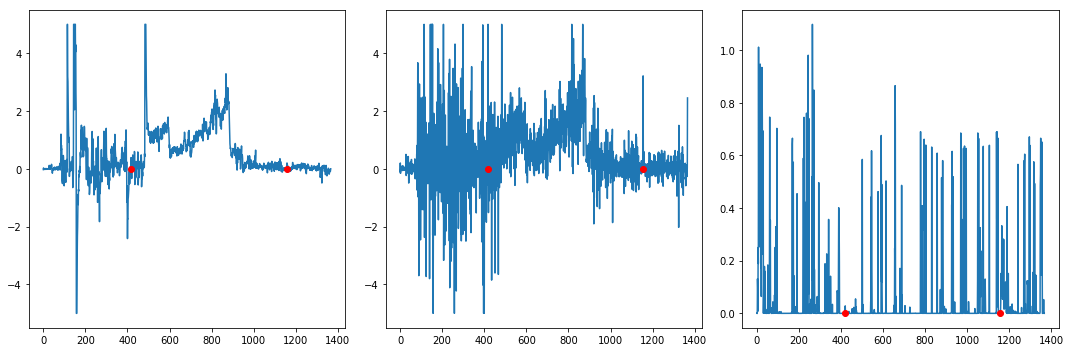

In [124]:
plotfig(done, all_done, 3000, tool.limit(eva_val, 5,-5), tool.limit(pderror_val,5,-5), entropy_val)

In [130]:
log_dic = tool.get_log(events2[4])
eva = log_dic[0]
pderror = log_dic[1]
entropy = log_dic[4]
eva_val = [i for i in eva.values()]
pderror_val = [i for i in pderror.values()]
entropy_val = [i for i in entropy.values()]
all_done = [i for i in log_dic[5].keys()]
done = all_done[2::3]

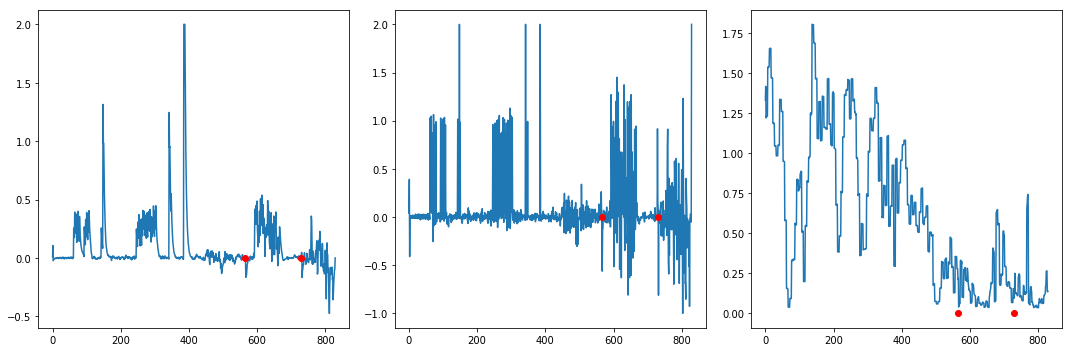

In [128]:
plotfig(done, all_done, 0, tool.limit(eva_val, 2,-1), tool.limit(pderror_val,2,-1), entropy_val)

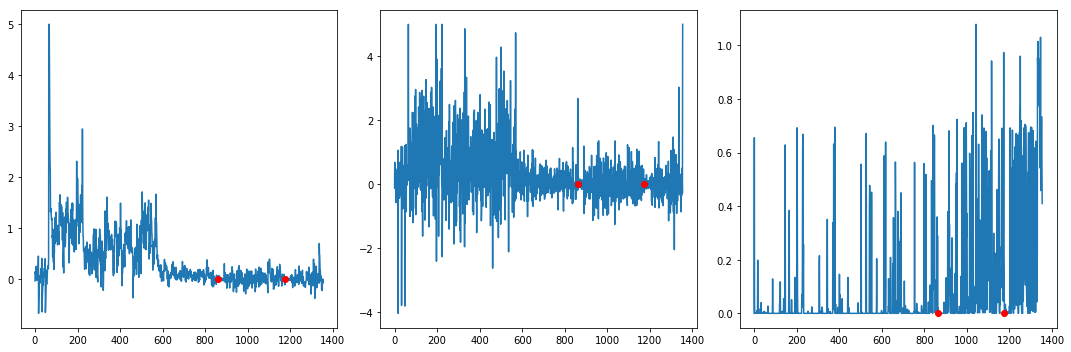

In [129]:
plotfig(done, all_done, 1000, tool.limit(eva_val, 5,-5), tool.limit(pderror_val,5,-5), entropy_val)

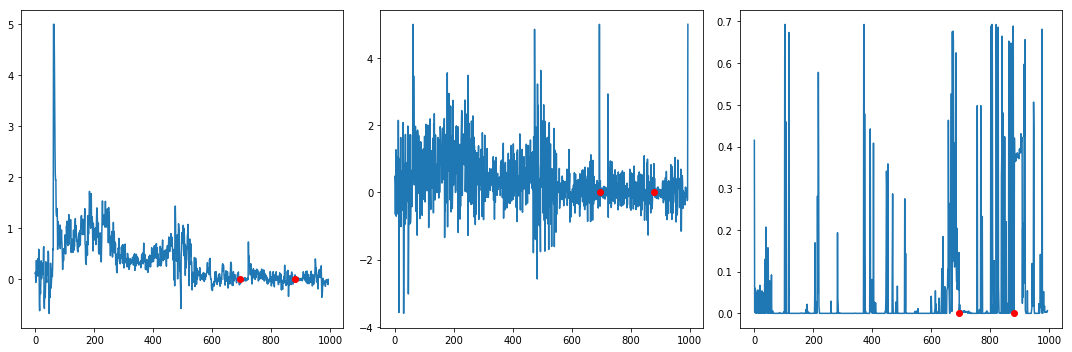

In [131]:
plotfig(done, all_done, 2000, tool.limit(eva_val, 5,-5), tool.limit(pderror_val,5,-5), entropy_val)

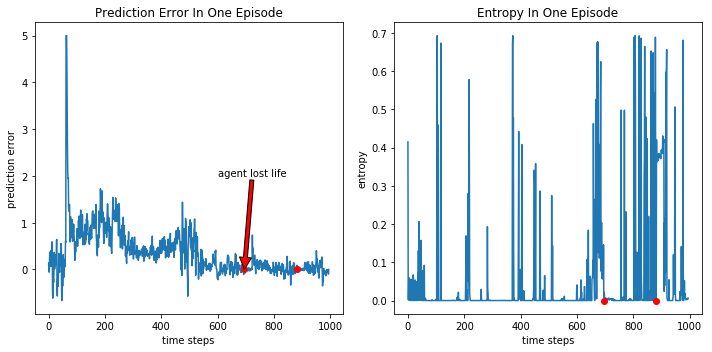

In [153]:
plotfig2(done, all_done, 2000, tool.limit(eva_val, 5,-5), tool.limit(pderror_val,5,-5), entropy_val)

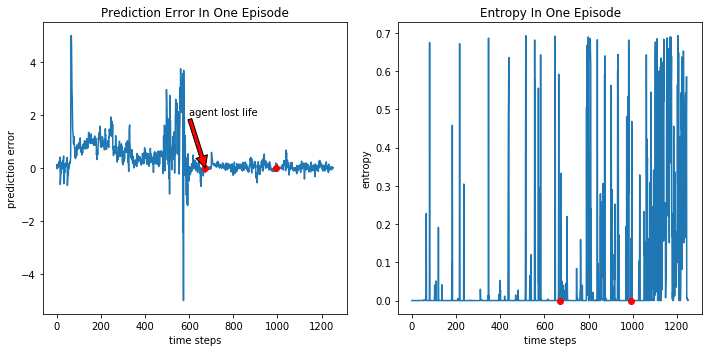

In [184]:
plotfig2(done, all_done, 3000, tool.limit(eva_val, 5,-5), tool.limit(pderror_val,5,-5), entropy_val)

In [167]:
len(entropy_val)

3125000

In [172]:
last_entropy = entropy_val[-50000:]

In [173]:
sum(last_entropy)/len(last_entropy)

0.032196748972532385

In [175]:
mean_entropy = 0.032196748972532385
bigger = 0
for e in last_entropy:
    if e > mean_entropy:
        bigger += 1
print(bigger)
    

5263


(array([3.9026e+04, 1.1710e+03, 7.2600e+02, 5.1100e+02, 3.7700e+02,
        3.0900e+02, 2.4400e+02, 2.3200e+02, 1.8400e+02, 1.6600e+02,
        1.5400e+02, 1.3800e+02, 1.1800e+02, 1.2300e+02, 1.0500e+02,
        1.0900e+02, 8.5000e+01, 7.7000e+01, 7.7000e+01, 8.6000e+01,
        7.8000e+01, 8.6000e+01, 6.1000e+01, 7.2000e+01, 6.5000e+01,
        6.5000e+01, 5.6000e+01, 4.6000e+01, 4.4000e+01, 4.1000e+01,
        5.5000e+01, 3.8000e+01, 4.7000e+01, 3.6000e+01, 3.1000e+01,
        3.7000e+01, 3.5000e+01, 3.4000e+01, 3.1000e+01, 3.3000e+01,
        3.6000e+01, 3.4000e+01, 3.3000e+01, 3.4000e+01, 2.8000e+01,
        3.6000e+01, 4.1000e+01, 2.7000e+01, 3.3000e+01, 2.8000e+01,
        2.7000e+01, 2.2000e+01, 1.8000e+01, 2.2000e+01, 1.7000e+01,
        2.3000e+01, 2.3000e+01, 2.3000e+01, 2.7000e+01, 2.5000e+01,
        1.7000e+01, 1.5000e+01, 2.2000e+01, 2.2000e+01, 1.8000e+01,
        2.2000e+01, 1.4000e+01, 2.1000e+01, 2.4000e+01, 1.8000e+01,
        1.6000e+01, 2.2000e+01, 1.7000e+01, 2.50

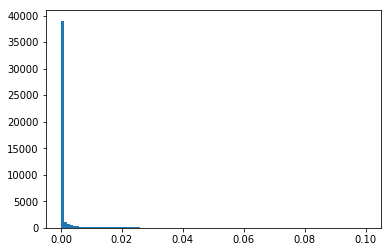

In [183]:
plt.hist([i for i in last_entropy if i < 0.1], 100)

In [181]:
len([i for i in last_entropy if i < 0.1])

46235

In [182]:
len(last_entropy)

50000

In [187]:
done[3180]

3123378

In [188]:
done[3181]

3124523

In [189]:
final_entropy = entropy_val[3123378:3124523]

In [190]:
len(final_entropy)

1145

In [191]:
sum(final_entropy)/len(final_entropy)

0.0359380264736425

In [193]:
len([i for i in final_entropy if i > 0.0359380264736425])

144

(array([812.,  17.,   8.,   8.,   7.,   9.,   6.,   4.,   4.,   4.,   4.,
          1.,   3.,   1.,   1.,   0.,   2.,   2.,   2.,   1.,   3.,   0.,
          1.,   1.,   1.,   3.,   1.,   1.,   2.,   1.,   3.,   1.,   1.,
          1.,   3.,   1.,   0.,   1.,   2.,   1.,   3.,   0.,   1.,   1.,
          1.,   0.,   1.,   0.,   1.,   1.,   1.,   1.,   0.,   1.,   0.,
          0.,   2.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          1.,   1.,   0.,   0.,   0.,   2.,   1.,   0.,   0.,   0.,   0.,
          1.,   1.,   1.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   1.,
          3.,   0.,   0.,   0.,   1.,   1.,   1.,   0.,   0.,   1.,   1.,
          1.]),
 array([2.76932314e-18, 9.96215548e-05, 1.99243110e-04, 2.98864665e-04,
        3.98486219e-04, 4.98107774e-04, 5.97729329e-04, 6.97350884e-04,
        7.96972439e-04, 8.96593994e-04, 9.96215548e-04, 1.09583710e-03,
        1.19545866e-03, 1.29508021e-03, 1.39470177e-03, 1.49432332e-03,
        1.59394488e-03, 1.6935

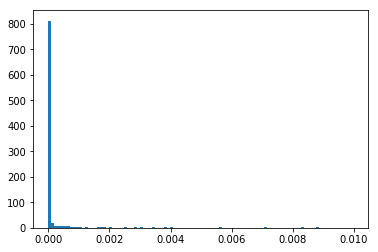

In [201]:
plt.hist([i for i in final_entropy if i < 0.01], 100)